In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
import math

In [92]:
def f(x):
    yw = x ** 4 + x ** 2 + 1
    mu = np.mean(yw)
    sd = np.std(yw)
    jitter = 0.1 * np.random.normal(mu, sd, size=len(x))
    y = yw + jitter
    return y

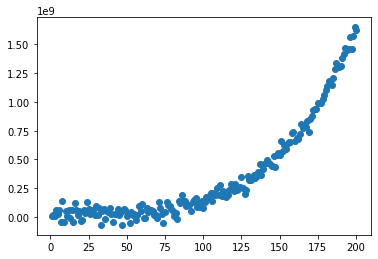

In [93]:
n_samples = 200
X = np.linspace(1, 200, n_samples)
y = f(X)
plt.scatter(X, y)
plt.show()

In [94]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# **Линейнная регрессия**

In [95]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X, y)
y_lin_fit = lin_reg.predict(X)
linear_r2 = r2_score(y, lin_reg.predict(X))

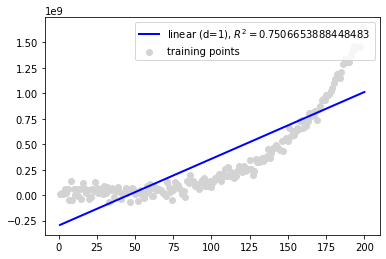

In [96]:
plt.scatter(X, y, color='lightgray')
plt.plot(X, y_lin_fit,
         label=f'linear (d=1), R^2={linear_r2}',
         lw=2)
plt.legend(loc='upper right')

# **Полиномиальная i степени**

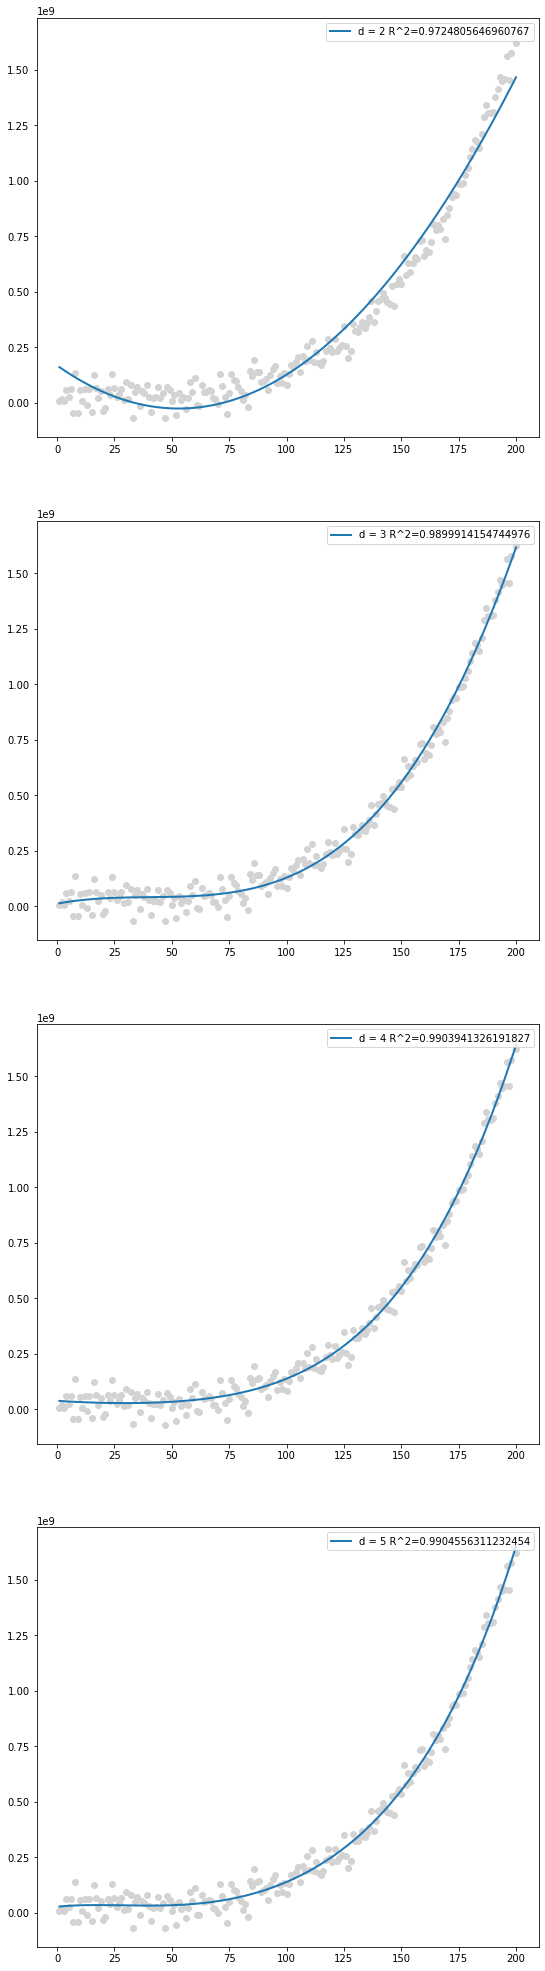

In [127]:
figure = plt.figure(figsize=(9, 54))
for i in range(2, 6):
  pol = PolynomialFeatures(degree=i)
  x_i = pol.fit_transform(X)
  lin_reg = lin_reg.fit(x_i, y)
  y_i = lin_reg.predict(pol.fit_transform(X))
  i_r2 = r2_score(y, lin_reg.predict(x_i))
  ax = plt.subplot(6, 1, i + 1)
  ax.scatter(X, y, color='lightgray')
  ax.plot(X, y_i,         
         label=f'd = {i} R^2={i_r2}', lw=2)
  ax.legend(loc='upper right')

# **Экспонента**

In [123]:
transformer = FunctionTransformer(np.log, validate=True)
y_trans = transformer.fit_transform(y)
regressor = LinearRegression()
for i in range(1, len(y_trans) - 1):
  if math.isnan(y_trans[i][0]):
    y_trans[i][0] = (y_trans[i - 1][0] + y_trans[i + 1][0]) * 0.5
for i in range(len(y_trans)):
  if math.isnan(y_trans[i]):
    y_trans[i] = y_trans[i-1]
results = regressor.fit(X, y_trans)
y_fit = results.predict(X)
exp_r2 = r2_score(y, np.exp(results.predict(X)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_function_transformer.py:205: RuntimeWarning: invalid value encountered in log
  return func(X, **(kw_args if kw_args else {}))


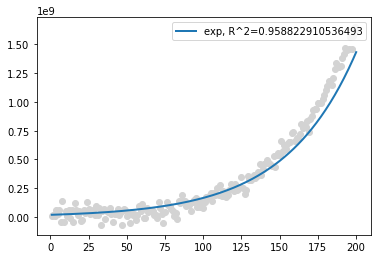

In [128]:
plt.scatter(X, y, color='lightgray')
plt.plot(X, np.exp(y_fit),
        label=f'exp, R^2={exp_r2}',lw=2)
plt.legend(loc='upper right')